In [33]:
import os
import pandas as pd
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def load_data(directory: str) -> pd.DataFrame:

    all_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                all_files.append(os.path.join(root, file))

    if not all_files:
        raise FileNotFoundError("No CSV files found in the given directory.")

    df = dd.read_csv(all_files)
    return df.compute()

data_path = "./Data/individual_book_train"

In [35]:
df_raw = pd.read_csv("./Data/individual_book_train/stock_27.csv")

In [36]:
df_raw.describe()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
count,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.000000,873499.0
mean,16007.459713,292.141403,0.999241,1.000883,0.998942,1.001184,94.563099,95.047862,75.959495,73.429307,27.0
std,9379.509645,173.528286,0.005421,0.005445,0.005441,0.005476,105.848809,105.229050,116.183756,99.975252,0.0
min,5.000000,0.000000,0.897584,0.903124,0.895621,0.903194,1.000000,1.000000,1.000000,1.000000,27.0
25%,7775.000000,141.000000,0.997414,0.998853,0.997140,0.999102,9.000000,9.000000,6.000000,7.000000,27.0
50%,15853.000000,289.000000,0.999313,1.000589,0.999084,1.000814,100.000000,100.000000,63.000000,54.000000,27.0
75%,23955.000000,442.000000,1.001049,1.002478,1.000792,1.002754,114.000000,114.000000,100.000000,100.000000,27.0
max,32767.000000,599.000000,1.075063,1.082831,1.075004,1.083596,7960.000000,5200.000000,10100.000000,10000.000000,27.0


In [37]:
df_raw.shape

(873499, 11)

In [38]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873499 entries, 0 to 873498
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time_id            873499 non-null  int64  
 1   seconds_in_bucket  873499 non-null  int64  
 2   bid_price1         873499 non-null  float64
 3   ask_price1         873499 non-null  float64
 4   bid_price2         873499 non-null  float64
 5   ask_price2         873499 non-null  float64
 6   bid_size1          873499 non-null  int64  
 7   ask_size1          873499 non-null  int64  
 8   bid_size2          873499 non-null  int64  
 9   ask_size2          873499 non-null  int64  
 10  stock_id           873499 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 73.3 MB


In [39]:
df = df_raw.copy()

In [40]:
df["midpoint1"] = (df["ask_price1"] + df["bid_price1"])/2
df["midpoint2"] = (df["ask_price2"] + df["bid_price2"])/2

df["bid_ask_spread1"] = df["ask_price1"] - df["bid_price1"]
df["bid_ask_spread2"] = df["ask_price2"] - df["bid_price2"]

df['log_return'] = np.log(df['midpoint1'] / df['midpoint1'].shift(1))
df = df.dropna(subset=['log_return'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873498 entries, 1 to 873498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time_id            873498 non-null  int64  
 1   seconds_in_bucket  873498 non-null  int64  
 2   bid_price1         873498 non-null  float64
 3   ask_price1         873498 non-null  float64
 4   bid_price2         873498 non-null  float64
 5   ask_price2         873498 non-null  float64
 6   bid_size1          873498 non-null  int64  
 7   ask_size1          873498 non-null  int64  
 8   bid_size2          873498 non-null  int64  
 9   ask_size2          873498 non-null  int64  
 10  stock_id           873498 non-null  int64  
 11  midpoint1          873498 non-null  float64
 12  midpoint2          873498 non-null  float64
 13  bid_ask_spread1    873498 non-null  float64
 14  bid_ask_spread2    873498 non-null  float64
 15  log_return         873498 non-null  float64
dtypes: floa

In [42]:
df.describe()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,midpoint1,midpoint2,bid_ask_spread1,bid_ask_spread2,log_return
count,873498.000000,873498.000000,873498.000000,873498.000000,873498.000000,873498.000000,873498.000000,873498.000000,873498.000000,873498.000000,873498.0,873498.000000,873498.000000,873498.000000,873498.000000,8.734980e+05
mean,16007.478033,292.141737,0.999241,1.000883,0.998942,1.001184,94.563089,95.047947,75.959581,73.429276,27.0,1.000062,1.000063,0.001642,0.002242,3.173083e-09
std,9379.499386,173.528104,0.005421,0.005445,0.005441,0.005476,105.848869,105.229080,116.183795,99.975305,0.0,0.005393,0.005390,0.001313,0.001723,5.609990e-04
min,5.000000,0.000000,0.897584,0.903124,0.895621,0.903194,1.000000,1.000000,1.000000,1.000000,27.0,0.901161,0.900424,0.000031,0.000123,-6.770078e-02
25%,7775.000000,141.000000,0.997414,0.998853,0.997140,0.999102,9.000000,9.000000,6.000000,7.000000,27.0,0.998148,0.998156,0.000852,0.001233,-9.299353e-06
50%,15853.000000,289.000000,0.999313,1.000589,0.999084,1.000814,100.000000,100.000000,63.000000,54.000000,27.0,0.999955,0.999956,0.001293,0.001780,0.000000e+00
75%,23955.000000,442.000000,1.001049,1.002478,1.000792,1.002754,114.000000,114.000000,100.000000,100.000000,27.0,1.001742,1.001741,0.001982,0.002651,9.508086e-06
max,32767.000000,599.000000,1.075063,1.082831,1.075004,1.083596,7960.000000,5200.000000,10100.000000,10000.000000,27.0,1.078652,1.078976,0.033341,0.042618,9.435658e-02


    window_size           mse
0            10  4.258758e-07
1            30  3.416702e-07
2            50  3.076659e-07
3            70  2.853205e-07
4            90  2.696597e-07
5           110  2.564418e-07
6           130  2.446451e-07
7           150  2.344824e-07
8           170  2.250839e-07
9           190  2.141267e-07
10          210  2.034147e-07
11          230  1.934837e-07
12          250  1.860189e-07
13          270  1.781106e-07
14          290  1.729942e-07
15          310  1.692357e-07
16          330  1.654073e-07
17          350  1.598785e-07
18          370  1.517823e-07
19          390  1.489125e-07
20          410  1.453874e-07
21          430  1.423524e-07
22          450  1.388561e-07
23          470  1.370323e-07
24          490  1.337039e-07
25          510  1.321381e-07
26          530  1.302938e-07
27          550  1.284986e-07
28          570  1.271442e-07
29          590  1.256981e-07


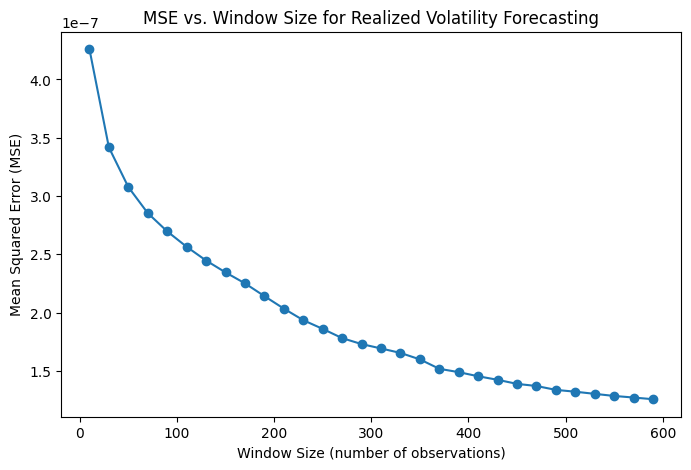

In [ ]:
window_sizes = range(10, 600, 20)
results = []

for w in window_sizes:
    col_name = f'rolling_rv_{w}'
    df[col_name] = df['log_return'].rolling(window=w).apply(lambda x: np.sqrt(np.sum(x**2)), raw=True)
    df[f'forecast_{w}'] = df[col_name].shift(1)
    valid = df.dropna(subset=[col_name, f'forecast_{w}'])
    mse = np.mean((valid[col_name] - valid[f'forecast_{w}'])**2)
    results.append({'window_size': w, 'mse': mse})

results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 5))
plt.plot(results_df['window_size'], results_df['mse'], marker='o')
plt.xlabel('Window Size (number of observations)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Window Size for Realized Volatility Forecasting')
plt.show()

In [46]:
window_size = 150
df['rolling_rv'] = df['log_return'].rolling(window=window_size).apply(lambda x: np.sqrt(np.sum(x**2)), raw=True)
df = df.dropna()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873349 entries, 150 to 873498
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time_id            873349 non-null  int64  
 1   seconds_in_bucket  873349 non-null  int64  
 2   bid_price1         873349 non-null  float64
 3   ask_price1         873349 non-null  float64
 4   bid_price2         873349 non-null  float64
 5   ask_price2         873349 non-null  float64
 6   bid_size1          873349 non-null  int64  
 7   ask_size1          873349 non-null  int64  
 8   bid_size2          873349 non-null  int64  
 9   ask_size2          873349 non-null  int64  
 10  stock_id           873349 non-null  int64  
 11  midpoint1          873349 non-null  float64
 12  midpoint2          873349 non-null  float64
 13  bid_ask_spread1    873349 non-null  float64
 14  bid_ask_spread2    873349 non-null  float64
 15  log_return         873349 non-null  float64
 16  rolli

In [48]:
df.describe()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,midpoint1,midpoint2,bid_ask_spread1,bid_ask_spread2,log_return,rolling_rv
count,873349.000000,873349.000000,873349.000000,873349.000000,873349.000000,873349.000000,873349.000000,873349.000000,873349.000000,873349.000000,873349.0,873349.000000,873349.000000,873349.000000,873349.000000,8.733490e+05,873349.000000
mean,16010.208178,292.162143,0.999240,1.000882,0.998941,1.001184,94.574015,95.055215,75.960368,73.427605,27.0,1.000061,1.000063,0.001642,0.002242,-4.796496e-09,0.004982
std,9377.970003,173.531999,0.005421,0.005445,0.005441,0.005476,105.852905,105.232742,116.191099,99.978146,0.0,0.005393,0.005390,0.001314,0.001723,5.610411e-04,0.004732
min,5.000000,0.000000,0.897584,0.903124,0.895621,0.903194,1.000000,1.000000,1.000000,1.000000,27.0,0.901161,0.900424,0.000031,0.000123,-6.770078e-02,0.000186
25%,7783.000000,141.000000,0.997413,0.998852,0.997140,0.999101,9.000000,9.000000,6.000000,7.000000,27.0,0.998148,0.998155,0.000852,0.001233,-9.300193e-06,0.002351
50%,15853.000000,289.000000,0.999312,1.000589,0.999083,1.000814,100.000000,100.000000,63.000000,54.000000,27.0,0.999955,0.999955,0.001293,0.001780,0.000000e+00,0.003627
75%,23955.000000,442.000000,1.001047,1.002477,1.000791,1.002754,114.000000,114.000000,100.000000,100.000000,27.0,1.001741,1.001741,0.001982,0.002651,9.508560e-06,0.005976
max,32767.000000,599.000000,1.075063,1.082831,1.075004,1.083596,7960.000000,5200.000000,10100.000000,10000.000000,27.0,1.078652,1.078976,0.033341,0.042618,9.435658e-02,0.095632


In [50]:
df['integrated_variance'] = (df['log_return'] ** 2).cumsum()
df['integrated_volatility'] = np.sqrt(df['integrated_variance'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873349 entries, 150 to 873498
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   time_id                873349 non-null  int64  
 1   seconds_in_bucket      873349 non-null  int64  
 2   bid_price1             873349 non-null  float64
 3   ask_price1             873349 non-null  float64
 4   bid_price2             873349 non-null  float64
 5   ask_price2             873349 non-null  float64
 6   bid_size1              873349 non-null  int64  
 7   ask_size1              873349 non-null  int64  
 8   bid_size2              873349 non-null  int64  
 9   ask_size2              873349 non-null  int64  
 10  stock_id               873349 non-null  int64  
 11  midpoint1              873349 non-null  float64
 12  midpoint2              873349 non-null  float64
 13  bid_ask_spread1        873349 non-null  float64
 14  bid_ask_spread2        873349 non-null 

In [52]:
df.describe()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,midpoint1,midpoint2,bid_ask_spread1,bid_ask_spread2,log_return,rolling_rv,integrated_variance,integrated_volatility
count,873349.000000,873349.000000,873349.000000,873349.000000,873349.000000,873349.000000,873349.000000,873349.000000,873349.000000,873349.000000,873349.0,873349.000000,873349.000000,873349.000000,873349.000000,8.733490e+05,873349.000000,8.733490e+05,873349.000000
mean,16010.208178,292.162143,0.999240,1.000882,0.998941,1.001184,94.574015,95.055215,75.960368,73.427605,27.0,1.000061,1.000063,0.001642,0.002242,-4.796496e-09,0.004982,1.370574e-01,0.349051
std,9377.970003,173.531999,0.005421,0.005445,0.005441,0.005476,105.852905,105.232742,116.191099,99.978146,0.0,0.005393,0.005390,0.001314,0.001723,5.610411e-04,0.004732,7.913837e-02,0.123372
min,5.000000,0.000000,0.897584,0.903124,0.895621,0.903194,1.000000,1.000000,1.000000,1.000000,27.0,0.901161,0.900424,0.000031,0.000123,-6.770078e-02,0.000186,1.934019e-09,0.000044
25%,7783.000000,141.000000,0.997413,0.998852,0.997140,0.999101,9.000000,9.000000,6.000000,7.000000,27.0,0.998148,0.998155,0.000852,0.001233,-9.300193e-06,0.002351,6.934409e-02,0.263333
50%,15853.000000,289.000000,0.999312,1.000589,0.999083,1.000814,100.000000,100.000000,63.000000,54.000000,27.0,0.999955,0.999955,0.001293,0.001780,0.000000e+00,0.003627,1.374146e-01,0.370695
75%,23955.000000,442.000000,1.001047,1.002477,1.000791,1.002754,114.000000,114.000000,100.000000,100.000000,27.0,1.001741,1.001741,0.001982,0.002651,9.508560e-06,0.005976,2.077972e-01,0.455848
max,32767.000000,599.000000,1.075063,1.082831,1.075004,1.083596,7960.000000,5200.000000,10100.000000,10000.000000,27.0,1.078652,1.078976,0.033341,0.042618,9.435658e-02,0.095632,2.749012e-01,0.524310


In [53]:
df["normalized_spread1"] = df["bid_ask_spread1"]/df["midpoint1"]
df["normalized_spread2"] = df["bid_ask_spread2"]/df["midpoint2"]

In [57]:
df["order_book_imbalance"] = df["bid_ask_spread1"]/df["bid_ask_spread2"]

In [61]:
print(df.head().to_string())

     time_id  seconds_in_bucket  bid_price1  ask_price1  bid_price2  ask_price2  bid_size1  ask_size1  bid_size2  ask_size2  stock_id  midpoint1  midpoint2  bid_ask_spread1  bid_ask_spread2  log_return  rolling_rv  integrated_variance  integrated_volatility  normalized_spread1  normalized_spread2  order_book_imbalance
150        5                301    1.005202    1.007148    1.004936    1.007236        102        104          9        100        27   1.006175   1.006086         0.001946         0.002300   -0.000044    0.002383         1.934019e-09               0.000044            0.001934            0.002286              0.846174
151        5                302    1.005892    1.007148    1.005626    1.007236        179        120          8        100        27   1.006520   1.006431         0.001256         0.001610    0.000343    0.002408         1.194964e-07               0.000346            0.001248            0.001600              0.780186
152        5                303    1.005

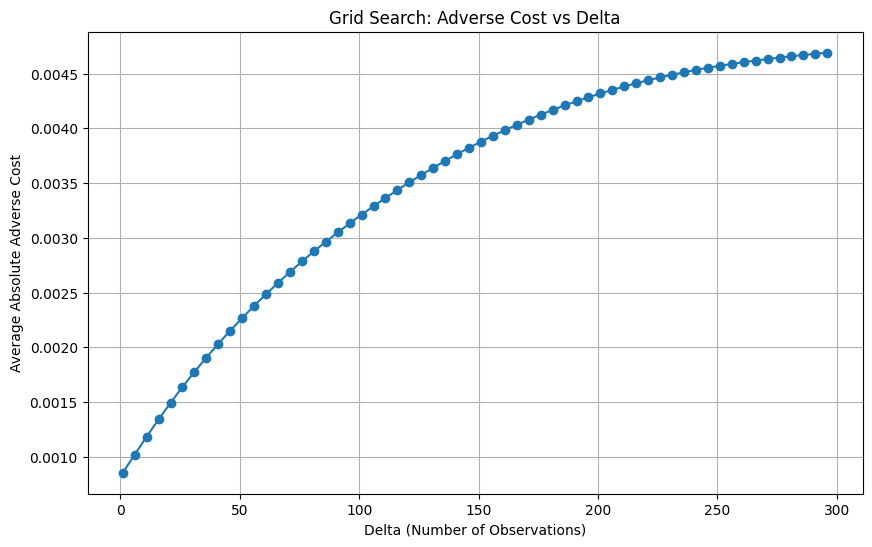

In [66]:
delta_values = range(1, 301, 5)
results = []

for delta in delta_values:
    temp_df = df.copy()
    temp_df['future_midpoint'] = temp_df['midpoint1'].shift(-delta)
    temp_df['adverse_cost_buy'] = temp_df['future_midpoint'] - temp_df['ask_price1']
    avg_abs_cost = temp_df['adverse_cost_buy'].abs().mean()
    results.append({'delta': delta, 'avg_abs_adverse_cost': avg_abs_cost})

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.plot(results_df['delta'], results_df['avg_abs_adverse_cost'], marker='o')
plt.xlabel('Delta (Number of Observations)')
plt.ylabel('Average Absolute Adverse Cost')
plt.title('Grid Search: Adverse Cost vs Delta')
plt.grid(True)
plt.show()

In [67]:
delta = 5

df['future_midpoint'] = df['midpoint1'].shift(-delta)

# 3. Calculate adverse selection costs
df['adverse_cost_buy'] = df['future_midpoint'] -  df['ask_price1']
df['adverse_cost_sell'] = df['bid_price1'] - df['future_midpoint']

In [70]:
df["cumulative_order_book_imbalance"] = df["order_book_imbalance"].cumsum()
df = df.dropna()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873344 entries, 150 to 873493
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   time_id                          873344 non-null  int64  
 1   seconds_in_bucket                873344 non-null  int64  
 2   bid_price1                       873344 non-null  float64
 3   ask_price1                       873344 non-null  float64
 4   bid_price2                       873344 non-null  float64
 5   ask_price2                       873344 non-null  float64
 6   bid_size1                        873344 non-null  int64  
 7   ask_size1                        873344 non-null  int64  
 8   bid_size2                        873344 non-null  int64  
 9   ask_size2                        873344 non-null  int64  
 10  stock_id                         873344 non-null  int64  
 11  midpoint1                        873344 non-null  float64
 12  midpo

In [74]:
def compute_lob_entropy(row, normalize=False):
    volumes = np.array([row['bid_size1'], row['bid_size2'], row['ask_size1'], row['ask_size2']], dtype=float)
    total_volume = volumes.sum()
    if total_volume == 0:
        return 0.0
    p = volumes / total_volume
    p = p[p > 0]
    entropy = -np.sum(p * np.log(p))
    
    if normalize:
        entropy /= np.log(4)
    return entropy

df['LOB_entropy'] = df.apply(compute_lob_entropy, axis=1)
df['LOB_entropy_normalized'] = df.apply(lambda row: compute_lob_entropy(row, normalize=True), axis=1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873344 entries, 150 to 873493
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   time_id                          873344 non-null  int64  
 1   seconds_in_bucket                873344 non-null  int64  
 2   bid_price1                       873344 non-null  float64
 3   ask_price1                       873344 non-null  float64
 4   bid_price2                       873344 non-null  float64
 5   ask_price2                       873344 non-null  float64
 6   bid_size1                        873344 non-null  int64  
 7   ask_size1                        873344 non-null  int64  
 8   bid_size2                        873344 non-null  int64  
 9   ask_size2                        873344 non-null  int64  
 10  stock_id                         873344 non-null  int64  
 11  midpoint1                        873344 non-null  float64
 12  midpo

In [76]:
df["microprice"] = (df["ask_price1"]*df["bid_size1"] + df["bid_price1"]*df["ask_size1"])/(df["bid_size1"] + df["ask_size1"])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873344 entries, 150 to 873493
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   time_id                          873344 non-null  int64  
 1   seconds_in_bucket                873344 non-null  int64  
 2   bid_price1                       873344 non-null  float64
 3   ask_price1                       873344 non-null  float64
 4   bid_price2                       873344 non-null  float64
 5   ask_price2                       873344 non-null  float64
 6   bid_size1                        873344 non-null  int64  
 7   ask_size1                        873344 non-null  int64  
 8   bid_size2                        873344 non-null  int64  
 9   ask_size2                        873344 non-null  int64  
 10  stock_id                         873344 non-null  int64  
 11  midpoint1                        873344 non-null  float64
 12  midpo